#  Make a custom distribution from the logp functions, compare to real one

In [15]:
import itertools

import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
import pymc3 as pm
from pymc3 import Model, Normal, Slice
from pymc3 import sample
from pymc3 import traceplot
from pymc3.distributions import Interpolated
from theano import as_op
import theano.tensor as tt
import numpy as np
from scipy import stats
import scipy
import tqdm
import pandas as pd

%matplotlib inline

%load_ext version_information

%version_information pymc3, scipy



The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.7.3 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.5.0
OS Darwin 18.6.0 x86_64 i386 64bit
pymc3 3.7
scipy 1.3.0
Tue Jun 04 16:47:41 2019 MDT

## Look at exponential

In [19]:

with pm.Model() as model:
    def logp_poi(k):
        return np.log(lam**k*np.exp(-lam)/scipy.special.factorial(k))
    
    
    
    poi = pm.Poisson('poi', 100)
    poi_custom = pm.DensityDist('poi_custom', logp_exp, )

    trace = pm.sample(10000)
    
    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [poi]
>NUTS: [poi_custom]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:09<00:00, 4406.34draws/s]
There were 1188 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0072562193308475745, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1163 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.009999136353924765, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1238 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.00673795472584753, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1178 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probab

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c9b2e1d0>,
      dtype=object)

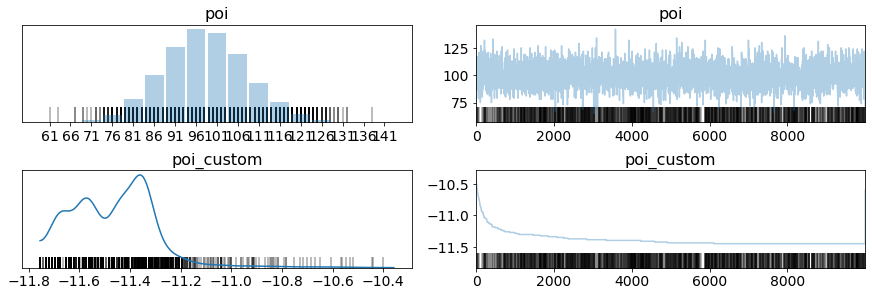

In [21]:
az.plot_trace(trace, combined=True)